[*********************100%***********************]  1 of 1 completed


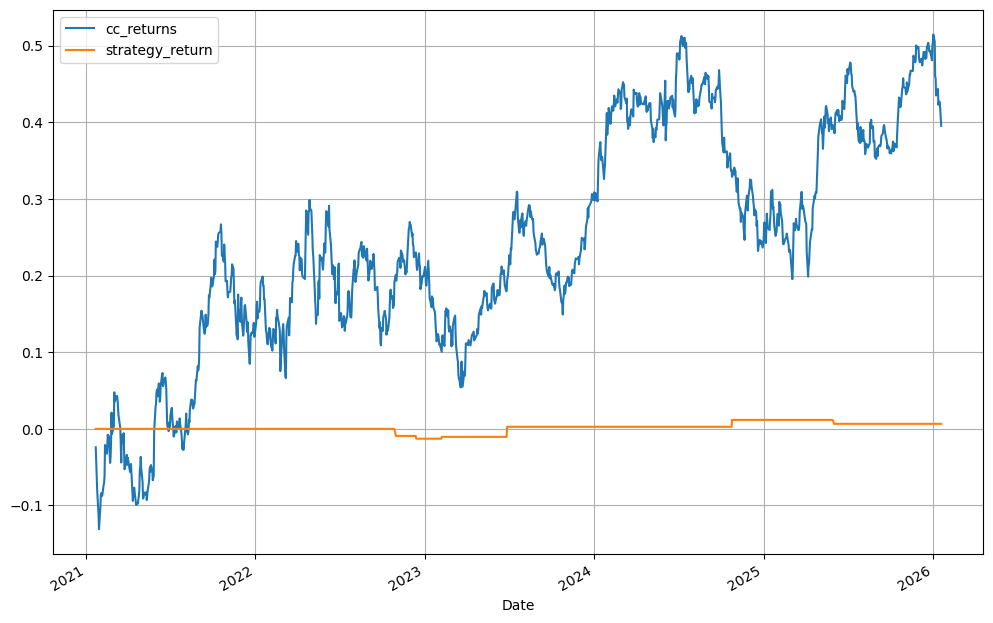

Buy and hold returns:  0.4
Strategy returns:  0.01


,Open,Close,Adj Close,cc_returns,sma50,sma200,previous_day_sma50,previous_day_sma200,position,strategy_return
Date,,,,,,,,,,
2026-01-13,1485.000000,1452.800049,1452.800049,-0.020709,1534.560000,1432.207168,1534.590000,1431.192850,0,-0.0
2026-01-14,1444.000000,1458.800049,1458.800049,0.004121,1534.154001,1433.131239,1534.560000,1432.207168,0,0.0
2026-01-15,1458.800049,1458.800049,1458.800049,0.000000,1533.868003,1434.059663,1534.154001,1433.131239,0,0.0
2026-01-16,1458.800049,1457.900024,1457.900024,-0.000617,1533.122004,1435.003525,1533.868003,1434.059663,0,-0.0
2026-01-19,1450.599976,1413.599976,1413.599976,-0.030857,1532.720005,1436.054940,1533.122004,1435.003525,0,-0.0


In [31]:
#Importing all requied libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

warnings.filterwarnings('ignore')

#Defining the start & end date for data we are testing
end1=datetime.datetime.today().date()
start1=end1-pd.Timedelta(days=365*5)

#downloading the data 
df=yf.download('RELIANCE.NS',start=start1,end=end1,interval='1D',auto_adjust=False,multi_level_index=False)

#arranging & removing the Cloumns as per our requirements
df=df[['Open','High','Low','Close','Adj Close','Volume']]
df=df.drop(['High','Low','Volume'],axis=1)

#Calculating log returns on Adj Close basis for better calculation
df['cc_returns']= np.log(df['Adj Close'] / df['Adj Close'].shift(1))

#Defining crossover ranges
m=50
n=200

#Creating column for sma's taken for analysis
df['sma50']=df['Adj Close'].rolling(window=m).mean()
df['sma200']=df['Adj Close'].rolling(window=n).mean()

#shiftiung by 1 to overlook lookahead bias
df['sma50']=df['sma50'].shift(1)
df['sma200']=df['sma200'].shift(1)

#Creating columns for previous day sma's
df['previous_day_sma50']=df['sma50'].shift(1)
df['previous_day_sma200']=df['sma200'].shift(1)
# Creating a column called 'position' which takes values 0, +1, and -1 for no trade that day,
# buy that day and sell that day respectively.

df['position']=np.where((df['sma50'] > df['sma200'])
                        & (df['previous_day_sma50'] < df['previous_day_sma200']), 1, 0)
df['position'] = np.where((df['sma50'] < df['sma200'])
                        & (df['previous_day_sma50'] > df['previous_day_sma200']), -1, df['position'])

#df['signal'].value_counts()[To counts how many signals are generated]

#Calculating strategy return
df['strategy_return']=df['cc_returns']*df['position'].shift(1)

#Plotting for good camparison
df[['cc_returns', 'strategy_return']].cumsum().plot(grid=True, figsize=(12, 8))
plt.show()

#result comparison
print('Buy and hold returns: ', np.round(df['cc_returns'].cumsum()[-1], 2))
print('Strategy returns: ', np.round(df['strategy_return'].cumsum()[-1], 2))

df.tail()